# KD-Seminar
## CNN

Basic Imports

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [5]:
import os
wd = os.getcwd()
wd

'C:\\Users\\Nils\\Documents\\KIT-TVWL\\Master\\SS 18\\KD Seminar\\Git\\mlp'

### Loading Data

**Read in financial Data**

In [6]:
fin_data = pd.read_csv("../finance_data/data/aggregated_returns.csv", index_col=["Timestamp"], parse_dates=True)
fin_data = fin_data.drop(columns=["Unnamed: 0"])
fin_data = fin_data.sort_index()
fin_data.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-30,-0.022990,0.031939,0.005759,-0.002937,0.005449,-0.002515,-0.002350,-0.018279,-0.003982,0.004127,-0.026947
2010-07-01,-0.010390,0.023302,-0.021987,0.013874,-0.009283,-0.081723,-0.051293,-0.012200,-0.027190,-0.047668,-0.019717
2010-07-02,0.001305,0.010501,0.004610,-0.011670,-0.026683,-0.134312,-0.018751,-0.006217,-0.001368,-0.008280,-0.034667
2010-07-06,0.010376,-0.009063,0.023455,0.005852,0.017777,-0.175470,0.019735,0.006820,0.028094,0.023085,0.001238
2010-07-07,-0.007772,0.018515,0.007211,0.035820,0.006629,-0.019430,0.023836,0.039568,-0.001796,0.019048,-0.002878


In [7]:
fin_data.shape

(1896, 11)

In [8]:
fin_data.shift(-1)[0:4]

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-30,-0.010390,0.023302,-0.021987,0.013874,-0.009283,-0.081723,-0.051293,-0.012200,-0.027190,-0.047668,-0.019717
2010-07-01,0.001305,0.010501,0.004610,-0.011670,-0.026683,-0.134312,-0.018751,-0.006217,-0.001368,-0.008280,-0.034667
2010-07-02,0.010376,-0.009063,0.023455,0.005852,0.017777,-0.175470,0.019735,0.006820,0.028094,0.023085,0.001238
2010-07-06,-0.007772,0.018515,0.007211,0.035820,0.006629,-0.019430,0.023836,0.039568,-0.001796,0.019048,-0.002878


In [9]:
fin_data_class = fin_data.applymap(lambda x: 0 if x < 0 else 1)
fin_data_class = fin_data_class.shift(-1)

In [10]:
fin_data_class.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-30,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-02,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2010-07-06,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2010-07-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [11]:
val_count = {0: 0, 1: 0}
for idx, row in fin_data_class.iterrows():
    tmp = row.value_counts()
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 9902, 1: 10943, '0_relative': 47.5, '1_relative': 52.5}

**Read in Document Data**

In [12]:
path_to_data = "../doc2vec/data/article_vectors_2015-11-25-2018-06-18.json"

In [13]:
data = pd.read_json(path_to_data)

In [14]:
data = data.applymap(lambda x: np.array(x))

In [15]:
data.head(2)

,Samsung,BASF,Apple,Tesla,Airbus,Bayer,BMW,Telefonica,Google,Allianz,Total
2015-11-25,"[[-0.09097237885, -0.512056529522, 0.448597371...","[[-0.224870830774, -3.794226408, -1.9525440931...","[[-2.04224681854, -1.60448515415, 0.2704625129...","[[-2.1069715023, -1.426415205, 1.64306604862, ...","[[2.23846936226, 3.11426877975, 0.093617297709...","[[1.51722872257, 2.5938539505, -0.247232601047...","[[0.157938063145, 0.579978168011, 0.4118370115...","[[0.473003387451, 2.60217881203, -0.5277323126...","[[-0.520612180233, -0.675680935383, -0.3074057...","[[0.0183677487075, 1.12623000145, -0.909998118...","[[-2.72483801842, 0.991170525551, -2.009325027..."
2015-11-26,"[[3.81038761139, 0.261076569557, 0.50902235508...","[[-1.22998988628, 0.361293852329, -0.980951845...","[[-0.65575748682, -0.652606129646, -1.20090234...","[[2.21736645699, -0.283544570208, 0.7639598250...","[[1.23432075977, 0.239986360073, -0.5406541228...","[[0.239219143987, -1.13649022579, -0.161926895...","[[-1.17502439022, 0.608320355415, 0.2831627428...","[[0.459036916494, 2.74760985374, -0.9232062101...","[[-0.319721221924, -0.454306691885, -1.1206489...","[[-2.44475650787, 1.04553902149, -0.1332414597...","[[0.563275456429, -2.01511955261, 1.2207951545..."


In [16]:
fin_data_dates = fin_data.index.date.tolist()
data_dates = data.index.date.tolist()

_________________________________________________________________________________________________________________________

### Data Preprocessing

**Filter Data**

In [17]:
available_dates = list(set(fin_data_dates).intersection(data_dates))

fin_data_class = fin_data_class[fin_data_class.index.isin(available_dates)]
fin_data_train = fin_data[fin_data.index.isin(available_dates)]
data = data[data.index.isin(available_dates)]

In [18]:
val_count = {0: 0, 1: 0}
for idx, row in fin_data_class.iterrows():
    tmp = row.value_counts()
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 3104, 1: 3397, '0_relative': 47.75, '1_relative': 52.25}

In [19]:
len(available_dates)

591

In [20]:
fin_data_train_vals = fin_data_train.values#.reshape(fin_data_train.shape[0], 1, fin_data_train.shape[1])
fin_data_train_vals.shape

(591, 11)

In [21]:
data.shape

(591, 11)

**Reformat Document Data to 4 dimensional Matrix** <br>
*"Box of Cubes:"* <br>
1st Dimension: Training Sample (single Day)<br>
*"Cube:"* <br>
2nd Dimension: (Max.) 50 - Articles of a Company - rest is filled with 0s <br>
3rd Dimension: 100 - Dimension of Document Vector <br>
4th Dimension: 11 - Each Company per Day

In [22]:
X = []

In [23]:
for idx, row in data.iterrows():
    #print(idx.date())
    tmp = data.loc[idx].values

    tmp_data = []
    for i,r in enumerate(tmp):
        #print(type(r))
        #print(type(r))
        if hasattr(r, 'shape') and r.shape[0] :
            #print(type(r))
            #print("HEY")
            r = np.array(r)
            #if r.shape[0] != 50:
            #    print(r.shape)
            p = 50-r.shape[0]
            r = np.pad(r, ((0,p),(0,0)), "constant")
            #print(r)
        else:
            r = np.zeros((50,100))
        tmp_data.append(r)
    tmp_data = np.array(tmp_data)
    tmp_data = tmp_data.reshape((50,100,11))
    #print(tmp_data)
    X.append(tmp_data)
    #data_dict[idx.date()] = tmp
    

In [24]:
X[0][0]

array([[-0.09097238, -0.51205653,  0.44859737, ...,  1.4446882 ,
         0.47213051, -2.83995199],
       [ 1.95817542,  0.74424815,  1.44354796, ..., -2.98738217,
        -0.17140767, -2.34347701],
       [ 0.48954654, -0.95549279, -2.56482577, ..., -2.01952577,
         2.60814977,  2.29795051],
       ..., 
       [ 1.70078266, -1.97810698,  0.12305968, ...,  2.63470483,
         0.11687999, -2.34644175],
       [ 0.56562304,  1.07893801, -1.85002875, ...,  0.65592211,
        -0.54387766, -0.20035765],
       [-1.85888422,  0.01419361,  0.76624453, ..., -0.70436901,
         1.79512227, -2.3566792 ]])

In [25]:
#X = np.array(final_d)
X = np.array(X)
X.shape

(591, 50, 100, 11)

In [26]:
#m[:, ::-1]

### Data Augmentation

In [48]:
tst = X[:300][:,:,::-1,:]
tst.shape

(300, 50, 100, 11)

In [49]:
X_flipped = np.flipud(X[:300])
X_flipped.shape

(300, 50, 100, 11)

In [50]:
X_augmented = np.concatenate((X[:300], X_flipped, tst))
X_augmented.shape

(900, 50, 100, 11)

In [51]:
Y = fin_data_class.values
Y_augmented = np.concatenate((Y[:300], Y[:300].copy(), Y[:300].copy()))
Y_augmented.shape

(900, 11)

In [52]:
fin_data_train_vals_augmented = np.concatenate((fin_data_train_vals[:300], fin_data_train_vals[:300].copy(), fin_data_train_vals[:300].copy()))
fin_data_train_vals_augmented.shape

(900, 11)

## First, simple CNN Model

**Imports**

In [53]:
from sklearn.model_selection import train_test_split

from keras import backend as K
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, GaussianNoise, GaussianDropout
from keras.layers import Conv1D, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalMaxPooling3D

from keras.initializers import RandomNormal

from keras import regularizers

from collections import Counter

Using TensorFlow backend.


**Metrics**

In [122]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


In [55]:
Y_augmented.shape

(900, 11)

**Train-Test-Split**

In [56]:
x_train, x_val, x_ret_train, x_ret_val, y_train, y_val = train_test_split(X, fin_data_train_vals, Y, 
                                                  test_size=0.4, random_state=58)

x_train_aug, x_val_aug, x_ret_train_aug, x_ret_val_aug, y_train_aug, y_val_aug = train_test_split(X_augmented, fin_data_train_vals_augmented, Y_augmented, test_size=0.01, random_state=58)

Check Distribution 

In [57]:
val_count = {0: 0, 1: 0}

for y in y_train_aug:
    tmp = Counter(y)
    #print(tmp)
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 4600, 1: 5201, '0_relative': 46.93, '1_relative': 53.07}

In [121]:
x_train_aug.shape

(594, 50, 100, 11)

Parameters of CNN

In [62]:
num_classes=11
num_filters= 150
filter_sizes = [3,4,5]
embedding_dim = x_train_aug.shape[2]
sequence_length = x_train_aug.shape[1] 
input_shape = x_train.shape[1:] if not x_train is None else x_train_aug[1:]

reg_param = 0.01
noise_layer_std = 1

In [63]:
sequence_length

50

In [64]:
def custom_tanh(x):
    return (K.tanh((2/3)*x) * 1.5)#1.7159) #(2/3)

def custom_sigmoid(x):
    return (K.sigmoid((3/4) * x) )#* 1.7159)

In [65]:
def make_first_model():
    model = Sequential()
    model.add(GaussianNoise(stddev=noise_layer_std,input_shape=input_shape))
    model.add(Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid',#input_shape=x_train.shape[1:], 
                     data_format="channels_last", activation="relu", kernel_regularizer=regularizers.l2(reg_param),
                     kernel_initializer=RandomNormal())) #relu
    #, kernel_regularizer=regularizers.l2(0.01)
    #model.add(Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='same', activation="relu"))

    model.add(BatchNormalization(axis=3))
    model.add(GaussianDropout(0.5))
    #model.add(MaxPooling2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))) #data_format="channels_last"
    model.add(AveragePooling2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))) 
    #model.add(GlobalMaxPooling3D(data_format="channels_last"))
    model.add(BatchNormalization(axis=3))
    #model.add(Conv2D(num_filters, kernel_size=(1,embedding_dim), strides=(1,1), activation="relu"))
    #model.add(MaxPooling2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1)))
    #model.add(Activation('relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    #model.add(GaussianNoise(stddev=3))

    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Flatten())
    #model.add(GaussianDropout(0.5))
    model.add(Dense(512, activation="relu")) #custom_tanh "relu" custom_tanh
    #model.add(Activation('relu'))
    model.add(GaussianDropout(0.5))
    #model.add(Dense(512, activation="relu"))
    #model.add(Dense(512, activation="relu"))
    model.add(Dense(num_classes, activation=custom_sigmoid)) #"sigmoid"  custom_sigmoid 
    
    adam_opt = keras.optimizers.adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)

    model.compile(loss='binary_crossentropy', 
              optimizer=adam_opt,#opt,"Adam"
              metrics=['binary_accuracy', f1, precision, recall]) #'binary_accuracy',
    
    return model

In [66]:
first_model = make_first_model()
first_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_1 (GaussianNo (None, 50, 100, 11)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 1, 150)        495150    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 1, 150)        600       
_________________________________________________________________
gaussian_dropout_1 (Gaussian (None, 48, 1, 150)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 1, 1, 150)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 1, 150)         600       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 150)         0         
__________

In [67]:
history = first_model.fit(x_train_aug, y_train_aug, validation_data = (x_val_aug, y_val_aug),
                          epochs=70, batch_size=32, verbose=2)

Train on 891 samples, validate on 9 samples
Epoch 1/70
 - 7s - loss: 12.7817 - binary_accuracy: 0.5135 - f1: 0.5429 - precision: 0.5412 - recall: 0.5464 - val_loss: 12.2466 - val_binary_accuracy: 0.5758 - val_f1: 0.4878 - val_precision: 0.4762 - val_recall: 0.5000
Epoch 2/70
 - 9s - loss: 12.0149 - binary_accuracy: 0.5027 - f1: 0.5377 - precision: 0.5309 - recall: 0.5479 - val_loss: 11.5161 - val_binary_accuracy: 0.6061 - val_f1: 0.5517 - val_precision: 0.5106 - val_recall: 0.6000
Epoch 3/70
 - 8s - loss: 11.2842 - binary_accuracy: 0.5030 - f1: 0.5415 - precision: 0.5301 - recall: 0.5554 - val_loss: 10.8279 - val_binary_accuracy: 0.5354 - val_f1: 0.5106 - val_precision: 0.4444 - val_recall: 0.6000
Epoch 4/70
 - 8s - loss: 10.5985 - binary_accuracy: 0.5089 - f1: 0.5444 - precision: 0.5366 - recall: 0.5554 - val_loss: 10.1831 - val_binary_accuracy: 0.4747 - val_f1: 0.5000 - val_precision: 0.4062 - val_recall: 0.6500
Epoch 5/70
 - 8s - loss: 9.9608 - binary_accuracy: 0.5136 - f1: 0.5510 -

**Plot Results**

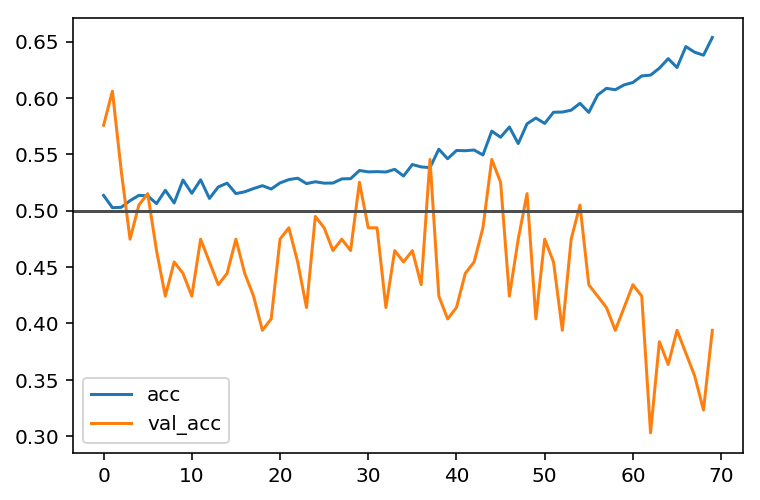

In [68]:
plt.plot(history.history["binary_accuracy"], label="acc")
plt.plot(history.history["val_binary_accuracy"], label="val_acc")
plt.axhline(0.5, c=".3")
plt.legend()
plt.show()

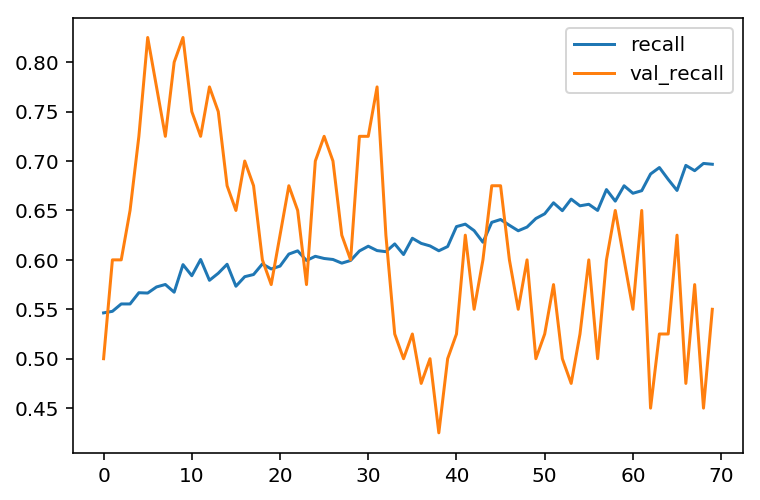

In [69]:
plt.plot(history.history["recall"], label="recall")
plt.plot(history.history["val_recall"], label="val_recall")

plt.legend()
plt.show()

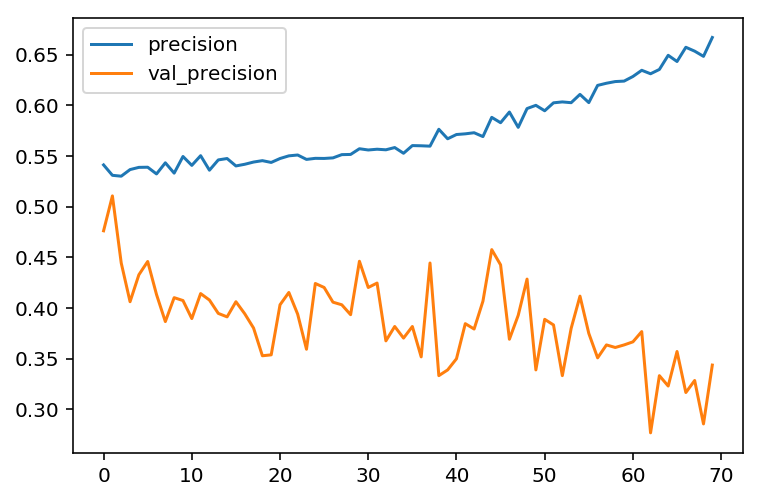

In [70]:
plt.plot(history.history["precision"], label="precision")
plt.plot(history.history["val_precision"], label="val_precision")

plt.legend()
plt.show()

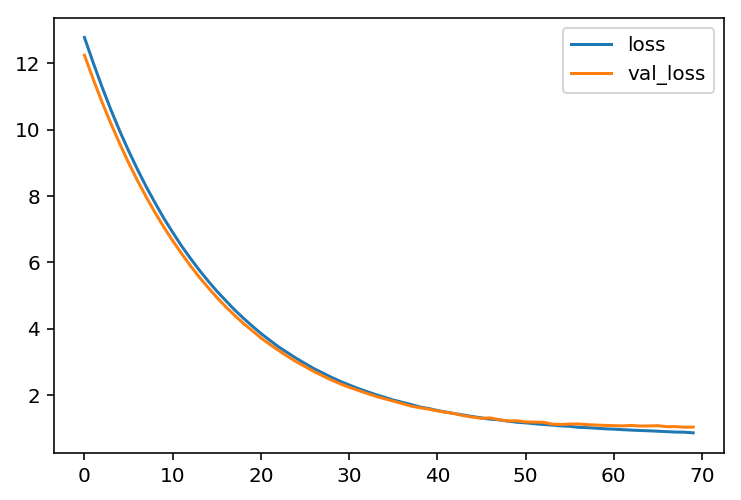

In [71]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

**Prep for Cut-Analysis**

In [105]:
preds = first_model.predict(X[300:])#X[300:]


In [106]:
df_y_val = pd.DataFrame(y_val_aug, columns=fin_data_class.columns)

In [107]:
fin_data_class.shape

(591, 11)

In [108]:
df_predictions = pd.DataFrame(preds, columns=fin_data_class.columns, index = fin_data_class[300:].index) #, index = fin_data_class.index
df_predictions.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2017-03-16,0.505784,0.596999,0.553734,0.617917,0.463506,0.603407,0.598566,0.486642,0.533264,0.410653,0.640461
2017-03-17,0.461058,0.438127,0.603179,0.623206,0.451609,0.552140,0.567309,0.490813,0.532630,0.364347,0.612499
2017-03-20,0.477641,0.439657,0.629398,0.732390,0.490458,0.404734,0.588484,0.422359,0.577873,0.427088,0.480845
2017-03-21,0.518871,0.465165,0.507460,0.611408,0.414793,0.548531,0.606988,0.480802,0.505636,0.385341,0.618259
2017-03-22,0.458265,0.477485,0.653269,0.670338,0.485495,0.388667,0.597428,0.482984,0.598038,0.448466,0.461582


### Cut-Analysis

**Calculate False Positives & False Negatives of a Result Dataframe**

In [76]:
def count_fp(x):
    company_list = fin_data_class.columns
    tmp = x[company_list]
    
    if 1 in tmp.value_counts() or 1.0 in tmp.value_counts():

        return tmp.value_counts()[1]
        
    else:
        return 0
    
def count_fn(x):
    company_list = fin_data_class.columns
    tmp = x[company_list]
    
    if -1 in tmp.value_counts() or -1.0 in tmp.value_counts():

        return tmp.value_counts()[-1]
    
    else:
        return 0

**Iterate over different cuts and save accuracy, FP & FN**

In [77]:
def try_cuts_arr(df, cut_count):
    
    cuts = np.linspace(0,1,cut_count)
    accs = []
    fp = []
    fn = []
    
    
    for c in cuts:
        df_tmp = df.applymap(lambda x: 1 if x > c else 0)

        df_tmp = df_y_val.rsub(df_tmp)
        df_tmp["error_sum"] = df_tmp.apply(lambda x: np.sum(abs(x)), axis=1)
        
        total_returns = df_tmp.shape[0] * df_tmp.shape[1]
        error_sum = df_tmp["error_sum"].sum()
        accuracy = (total_returns - error_sum) / total_returns
        
        accs.append(accuracy)
        
        false_positive = np.sum(df_tmp.apply(count_fp, axis=1))
        false_negative = df_tmp.apply(count_fn, axis=1).sum()
        
        fp.append(false_positive)
        fn.append(false_negative)
        
    return accs, fp, fn, cuts

In [78]:
def try_cuts(df, cut_count, subset=None):
    
    cuts = np.linspace(0,1,cut_count)
    accs = []
    fp = []
    fn = []
    
    for c in cuts:
        df_tmp = df.applymap(lambda x: 1 if x > c else 0)
        if subset:
            df_tmp = fin_data_class[subset].rsub(df_tmp)
        else:
            df_tmp = fin_data_class.rsub(df_tmp)
        df_tmp["error_sum"] = df_tmp.apply(lambda x: np.sum(abs(x)), axis=1)
        
        total_returns = df_tmp.shape[0] * df_tmp.shape[1]
        error_sum = df_tmp["error_sum"].sum()
        accuracy = (total_returns - error_sum) / total_returns
        
        accs.append(accuracy)
        
        false_positive = np.sum(df_tmp.apply(count_fp, axis=1))
        false_negative = df_tmp.apply(count_fn, axis=1).sum()
        
        fp.append(false_positive)
        fn.append(false_negative)
        
        
    return accs, fp, fn, cuts

In [84]:
def second_largest(numbers):
    count = 0
    m1 = m2 = float('-inf')
    for x in numbers:
        count += 1
        if x > m2:
            if x >= m1:
                m1, m2 = x, m1            
            else:
                m2 = x
    return m2 if count >= 2 else None

In [79]:
accs, fp, fn, cuts = try_cuts(df_predictions, 60, subset=slice(300, -1)) #subset=slice(300, -1)
#accs, fp, fn, cuts = try_cuts_arr(df_predictions, 30)

In [85]:
second_largest(accs)

0.56557846506300113

In [86]:
max_index = accs.index(max(accs))
snd_max_index = accs.index(second_largest(accs))
cuts[max_index]
print("Achieved Accuracy {}% with a cut at {}".format(round(max(accs)*100, 2), round(cuts[max_index], 2)))
print("Second highest Accuracy {}% with a cut at {}".format(round(second_largest(accs) * 100, 2), round(cuts[snd_max_index], 2)))

Achieved Accuracy 56.56% with a cut at 0.41
Second highest Accuracy 56.56% with a cut at 0.41


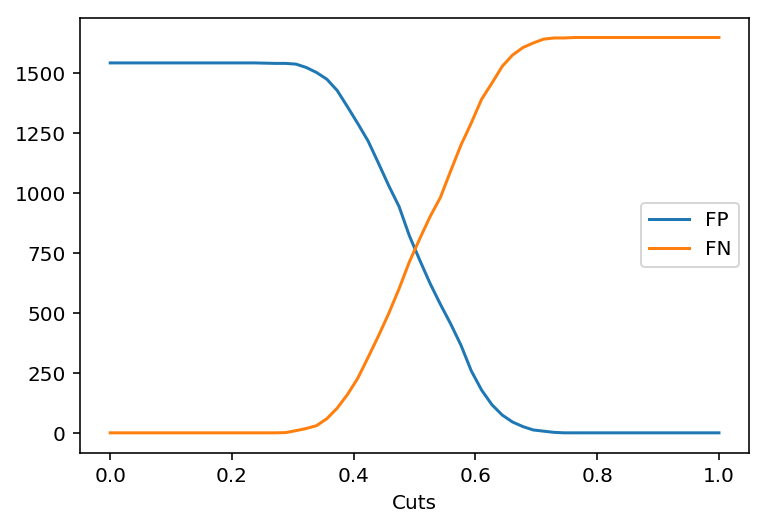

In [81]:
plt.plot(cuts, fp, label="FP")
plt.plot(cuts, fn, label="FN")
plt.xlabel("Cuts")
plt.legend()
plt.show()

Text(0,0.5,'Accuracy')

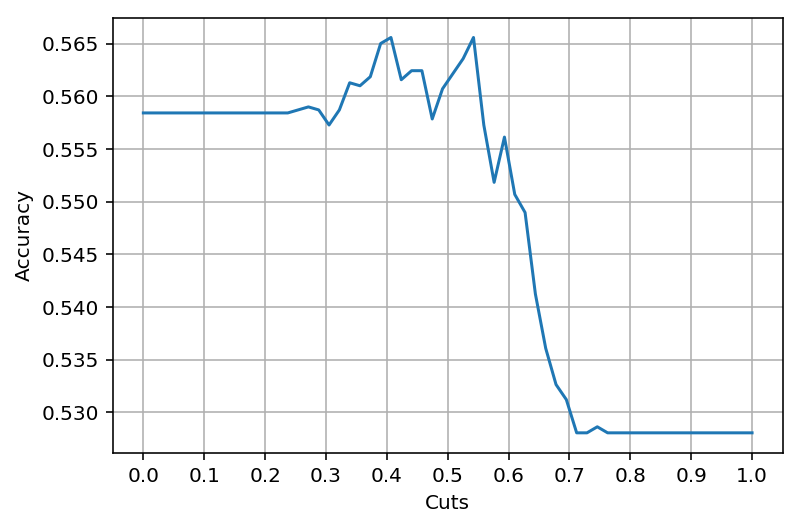

In [100]:
plt.plot(cuts, accs)
plt.grid(True)
plt.xlabel("Cuts")
plt.xticks(np.linspace(0,1,11))
plt.ylabel("Accuracy")

**Apply Cut**

In [109]:
df_predictions = df_predictions.applymap(lambda x: 1 if x > 0.54 else 0) #cuts[max_index]
df_predictions.to_csv("./predictions/predictions_frst_model_non_training_data_with_data_augmentation_late_cut.csv")
df_predictions.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2017-03-16,0,1,1,1,0,1,1,0,0,0,1
2017-03-17,0,0,1,1,0,1,1,0,0,0,1
2017-03-20,0,0,1,1,0,0,1,0,1,0,0
2017-03-21,0,0,0,1,0,1,1,0,0,0,1
2017-03-22,0,0,1,1,0,0,1,0,1,0,0


In [102]:
fin_data_class.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2015-11-25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2015-11-27,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2015-11-30,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2015-12-01,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2015-12-02,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [150]:
df_pred_errors = fin_data_class.rsub(df_predictions)

In [151]:
df_pred_errors["error_sum"] = df_pred_errors.apply(lambda x: np.sum(abs(x)), axis=1)
df_pred_errors["fale_pos_sum"] = df_pred_errors.apply(count_fp, axis=1)
df_pred_errors["fale_neg_sum"] = df_pred_errors.apply(count_fn, axis=1)

In [152]:
df_pred_errors["fale_pos_sum"].sum()

1303

In [153]:
df_pred_errors["fale_neg_sum"].sum()

264

In [110]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import classification_report

In [111]:
print(classification_report(Y[300:].ravel(), df_predictions.values.ravel()))

             precision    recall  f1-score   support

        0.0       0.51      0.64      0.57      1551
        1.0       0.55      0.41      0.47      1650

avg / total       0.53      0.52      0.52      3201



In [112]:
precision, recall, thresholds = precision_recall_curve(Y[300:].ravel(), preds.ravel())

Text(0,0.5,'Precision')

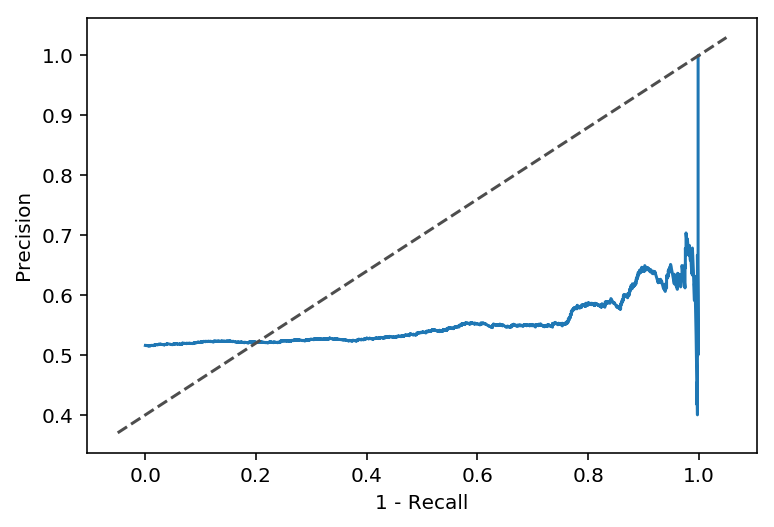

In [113]:
plt.plot((1 - recall), precision)
#plt.step((1-recall), thresholds.add(1))
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel("1 - Recall")
plt.ylabel("Precision")

In [114]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y[300:].ravel(), preds.ravel())

In [115]:
auc_keras = auc(fpr_keras, tpr_keras)

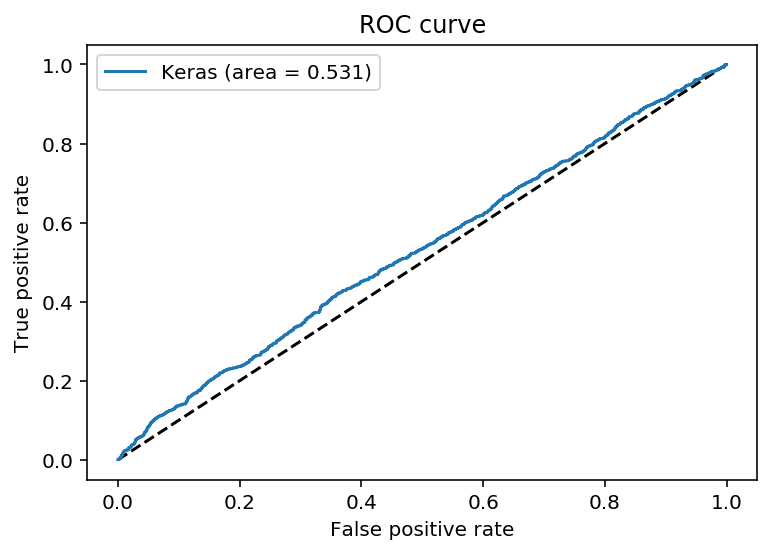

In [116]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [92]:
confusion_matrix(Y[300:].ravel(), df_predictions.values.ravel())

array([[ 253, 1298],
       [ 228, 1422]], dtype=int64)

## Second Model

In [117]:
from keras.layers import Dense, Input, Flatten, Reshape, concatenate, Dropout, Concatenate, Activation
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Embedding, MaxPool2D, AvgPool2D
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.models import Model
from keras import optimizers
from keras import regularizers

from keras.optimizers import Adam

In [118]:
def _bn_relu(input):
    """Helper to build a BN -> relu block
    """
    norm = BatchNormalization(axis=3)(input)
    return Activation("relu")(norm)

def _relu_bn(input):
    """Helper to build a relu -> BN block
    """
    act = Activation("relu")(input)
    return BatchNormalization(axis=3)(act)

def _bn_relu_flat(input):
    """Helper to build a BN -> relu block
    """
    norm = BatchNormalization(axis=1)(input)
    return Activation("relu")(norm)

In [123]:
inputs = Input(shape=x_train.shape[1:], dtype="float64", name="input_d2v")#, dtype='int32'[1:]

return_inputs = Input(shape=x_ret_train.shape[1:], name="input_rets")#, dtype="float64")

#reshape = Reshape((x_train[0],sequence_length,embedding_dim,11))(x_train)
dense_returns = Dense(50, activation=custom_tanh)(return_inputs)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', 
                kernel_initializer='RandomNormal', kernel_regularizer=regularizers.l1(0.001))(inputs) #, activation='relu'
batch_norm_0 = _bn_relu(conv_0)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', 
                kernel_initializer='RandomNormal', kernel_regularizer=regularizers.l1(0.001))(inputs) #, activation='relu'
batch_norm_1 = _bn_relu(conv_1)#atchNormalization()(conv_1)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', 
                kernel_initializer='RandomNormal', kernel_regularizer=regularizers.l1(0.001))(inputs) #, activation='relu'
batch_norm_2 = _bn_relu(conv_2) #BatchNormalization()(conv_2)



maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_0)#(conv_0)
avgpool_0 = AvgPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_0)#(conv_0)
dropout_0 = Dropout(0.5)(maxpool_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_1)#(conv_1)
avgpool_1 = AvgPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_1)#(conv_0)
dropout_1 = Dropout(0.5)(maxpool_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_2)#(conv_2)
avgpool_2 = AvgPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_2)#(conv_0)
dropout_2 = Dropout(0.5)(avgpool_2)

concatenated_tensor = concatenate([dropout_0, dropout_1, dropout_2]) #(axis=1) ([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
flatten_with_returns = concatenate([flatten, dense_returns])
#flatten_2 = Flatten()(flatten_with_returns)
hidden_layer = Dense(256)(flatten_with_returns) #flatten , activation="relu"
batch_norm_3 = _bn_relu_flat(hidden_layer)
dropout_3 = Dropout(0.5)(batch_norm_3)
hidden_layer_2 = Dense(128)(dropout_3) #flatten , activation="relu"
batch_norm_4 = _bn_relu_flat(hidden_layer_2)
dropout_4 = Dropout(0.5)(batch_norm_4)
output = Dense(num_classes, activation=custom_sigmoid)(dropout_4) #"softmax"

# this creates a model that includes
model = Model(inputs=[inputs, return_inputs], outputs=output)

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=2, 
                             save_best_only=True, mode='auto')
tensorboard = TensorBoard(log_dir='./logs/run1', histogram_freq=1, write_graph=True, write_images=False)  

adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0) #1e-8

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', f1, recall, precision])
print("Traning Model...")
model.summary()

Traning Model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_d2v (InputLayer)          (None, 50, 100, 11)  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 48, 1, 150)   495150      input_d2v[0][0]                  
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 47, 1, 150)   660150      input_d2v[0][0]                  
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 46, 1, 150)   825150      input_d2v[0][0]                  
____________________________________________________________________________________________

In [124]:
model_train_input = {"input_d2v": x_train_aug, "input_rets": x_ret_train_aug}
model_val_input = {"input_d2v": x_val_aug, "input_rets": x_ret_val_aug}

In [125]:
y_train_aug.shape

(891, 11)

In [ ]:
model2 = model.fit(model_train_input, y_train_aug, batch_size=32, epochs=60, verbose=2, callbacks=[checkpoint], #tensorboard
                   validation_data=(model_val_input, y_val_aug)) # starts training

Train on 891 samples, validate on 9 samples
Epoch 1/60


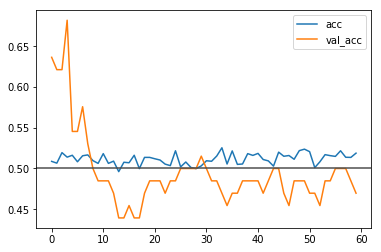

In [322]:
plt.plot(model2.history["acc"], label="acc")
plt.plot(model2.history["val_acc"], label="val_acc")
plt.axhline(0.5, c=".3")
plt.legend()
plt.show()

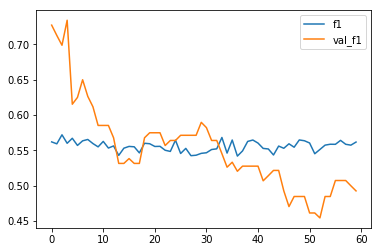

In [323]:
plt.plot(model2.history["f1"], label="f1")
plt.plot(model2.history["val_f1"], label="val_f1")

plt.legend()
plt.show()

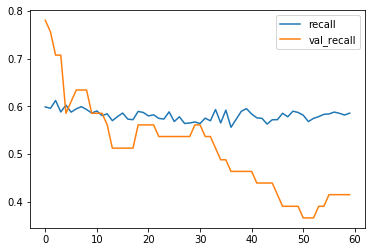

In [324]:
plt.plot(model2.history["recall"], label="recall")
plt.plot(model2.history["val_recall"], label="val_recall")

plt.legend()
plt.show()

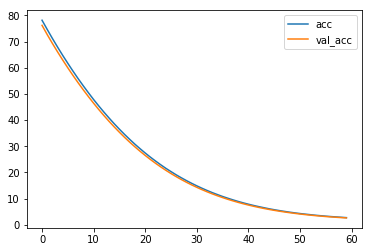

In [325]:
plt.plot(model2.history["loss"], label="acc")
plt.plot(model2.history["val_loss"], label="val_acc")
plt.legend()
plt.show()

In [326]:
preds2 = model.predict([X[300:], fin_data_train_vals[300:]])

In [327]:
df_predictions2 = pd.DataFrame(preds2, columns=fin_data_class.columns, index = fin_data_class[300:].index) #, index = fin_data_class[300:].index
df_predictions2.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2017-03-16,0.556646,0.478174,0.547453,0.534088,0.510106,0.465790,0.537112,0.490327,0.481985,0.474605,0.443605
2017-03-17,0.536055,0.461570,0.569908,0.565544,0.509083,0.486554,0.554193,0.449249,0.478197,0.485805,0.447369
2017-03-20,0.545807,0.484752,0.536010,0.532452,0.500150,0.489072,0.529660,0.484092,0.501854,0.483898,0.465522
2017-03-21,0.578641,0.444170,0.530612,0.570145,0.488992,0.501111,0.557445,0.469205,0.483279,0.450129,0.476344
2017-03-22,0.563035,0.474697,0.554222,0.528193,0.511711,0.507954,0.557651,0.493816,0.466486,0.473110,0.469104


In [328]:
accs, fp, fn, cuts = try_cuts(df_predictions2, 50, subset=slice(300,-1)) #, subset=slice(0,250)
#accs, fp, fn, cuts = try_cuts_arr(df_predictions2, 60)
max_index = accs.index(max(accs))
print("Achieved Accuracy {}% with a cut at {}".format(round(max(accs)*100, 2), round(cuts[max_index], 2)))

Achieved Accuracy 55.87% with a cut at 0.43


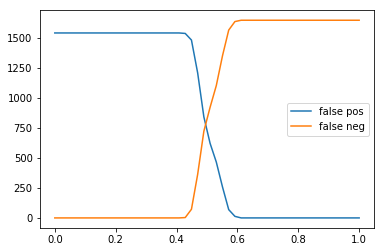

In [329]:
plt.plot(cuts, fp, label="false pos")
plt.plot(cuts, fn, label="false neg")
plt.legend()
plt.show()

Text(0,0.5,'Accuracy')

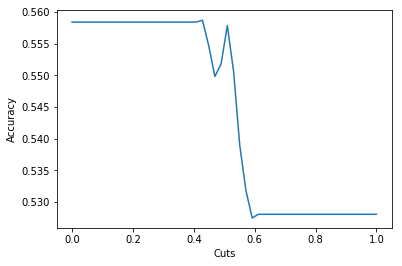

In [330]:
plt.plot(cuts, accs)
plt.xlabel("Cuts")
plt.ylabel("Accuracy")

In [331]:
df_predictions2 = df_predictions2.applymap(lambda x: 1 if x > 0.51 else 0) # cuts[max_index]
df_predictions2.to_csv("./predictions/predictions_scnd_model_without_training_LOOKING_AT_PR.csv")
df_predictions2.tail()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2018-06-11,1,0,1,1,0,0,1,0,0,0,0
2018-06-12,1,0,1,1,0,0,1,0,0,0,0
2018-06-14,1,0,1,1,1,1,1,0,0,0,0
2018-06-15,1,0,1,1,0,0,1,0,0,0,0
2018-06-18,1,0,1,1,0,0,1,0,0,0,0


In [255]:
fin_data_class.tail()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2018-06-11,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2018-06-12,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2018-06-14,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2018-06-15,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2018-06-18,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [281]:
precision, recall, thresholds = precision_recall_curve(Y[300:].ravel(), preds2.ravel())

Text(0,0.5,'Precision')

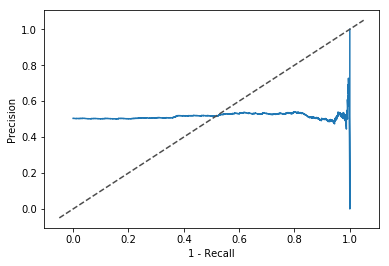

In [282]:
plt.plot((1 - recall), precision)
#plt.step((1-recall), thresholds.add(1))
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel("1 - Recall")
plt.ylabel("Precision")

In [332]:
print(classification_report(Y[300:].ravel(), df_predictions2.values.ravel()))

             precision    recall  f1-score   support

        0.0       0.50      0.60      0.54      1551
        1.0       0.54      0.44      0.48      1650

avg / total       0.52      0.52      0.51      3201



In [333]:
confusion_matrix(Y[300:].ravel(), df_predictions2.values.ravel())

array([[924, 627],
       [922, 728]], dtype=int64)